In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import torch
from torchvision.transforms import Compose, Resize, ToTensor
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [5]:
model = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
model.eval()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip


Loading weights:  None


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt" to /root/.cache/torch/hub/checkpoints/midas_v21_small_256.pt
100%|██████████| 81.8M/81.8M [00:00<00:00, 111MB/s]


MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

In [17]:
transform=Compose([
    Resize((256,256)),
    ToTensor()
])


def preprocessing_image(image_path):
  image=Image.open(image_path).convert("RGB")
  input_tensor = transform(image).unsqueeze(0)
  return input_tensor

def predict_depth(model, input_tensor):
  with torch.no_grad():
    depth_map=model(input_tensor)
    depth_map=depth_map.squeeze().numpy()
  return depth_map

def visualize_and_save(image_path, depth_map, output_path):
  depth_map_normalized=cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)
  depth_map_coloured=cv2.applyColorMap(depth_map_normalized.astype(np.uint8), cv2.COLORMAP_JET)

  original_image=cv2.imread(image_path)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Original Image")
  plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.subplot(1,2,2)
  plt.title("Depth Map")
  plt.imshow(depth_map_coloured)
  plt.axis("off")
  plt.show()

  output_image_path=os.path.join(output_path, f"depth_map_{os.path.basename(image_path)}")
  cv2.imwrite(output_image_path, depth_map_normalized.astype(np.uint8))
  print(f"Depth map saved to : {output_image_path}")

def process_dataset(dataset_path, output_path):
  if not os.path.exists(output_path):
    os.makedirs(output_path)

  for image_name in os.listdir(dataset_path):
    image_path=os.path.join(dataset_path, image_name)
    if image_name.lower().endswith((".jpg",".png",".jpeg","pgm")):
      try:
        input_tensor=preprocessing_image(image_path)
        depth_map=predict_depth(model, input_tensor)
        visualize_and_save(image_path, depth_map, output_path)
      except Exception as e:
        print(f"Error processing {image_path}: {e}")
    else:
      print(f"Skipped non-image file: {image_path}")






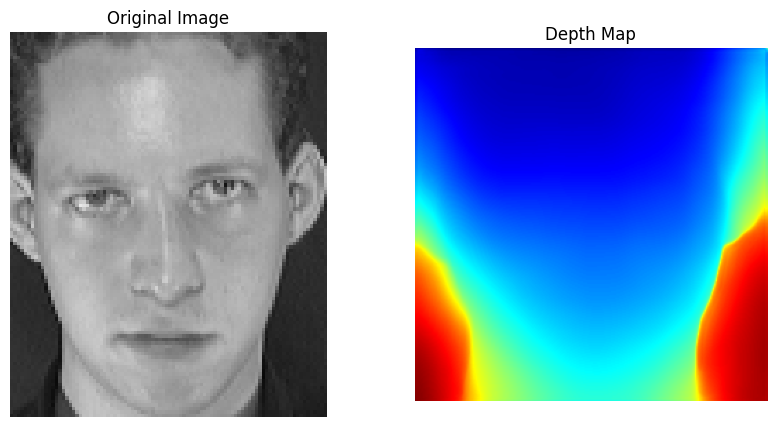

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_3.pgm


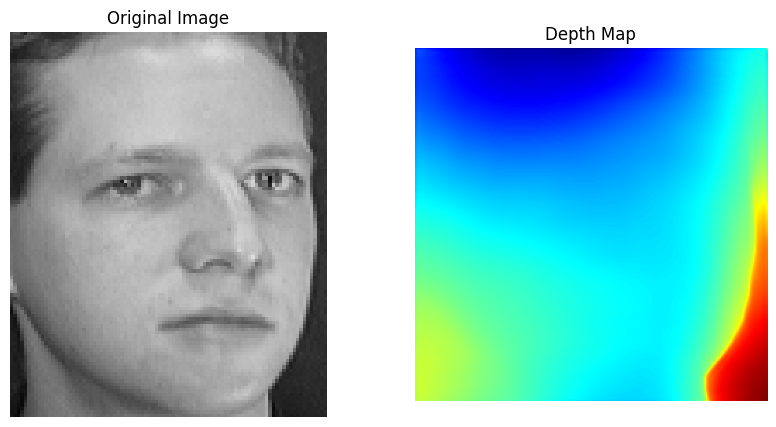

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_5.pgm


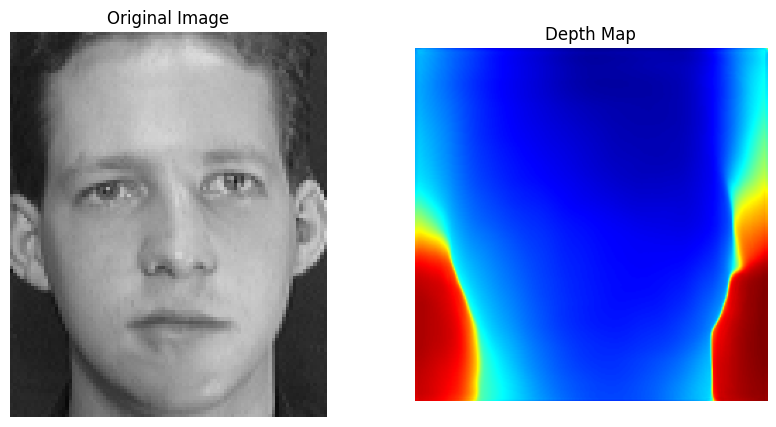

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_8.pgm


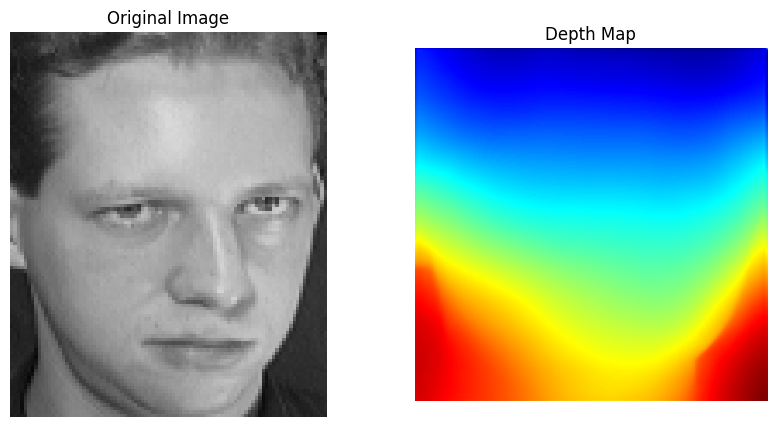

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_10.pgm


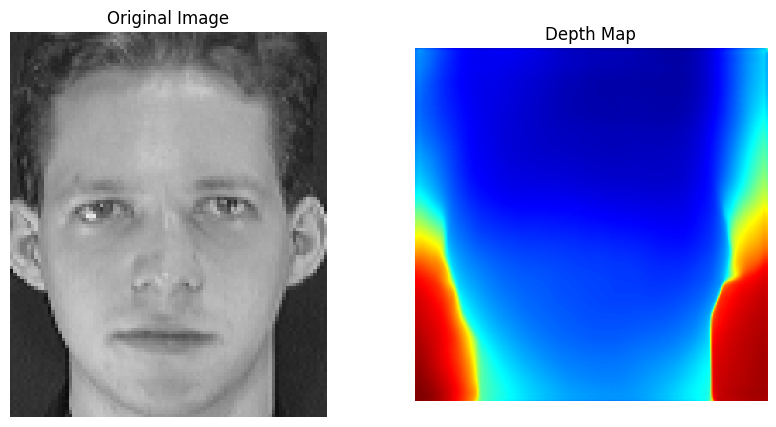

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_1.pgm


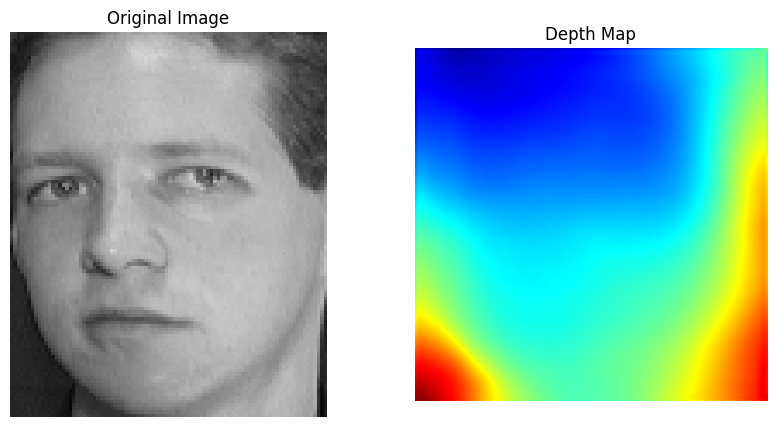

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_4.pgm


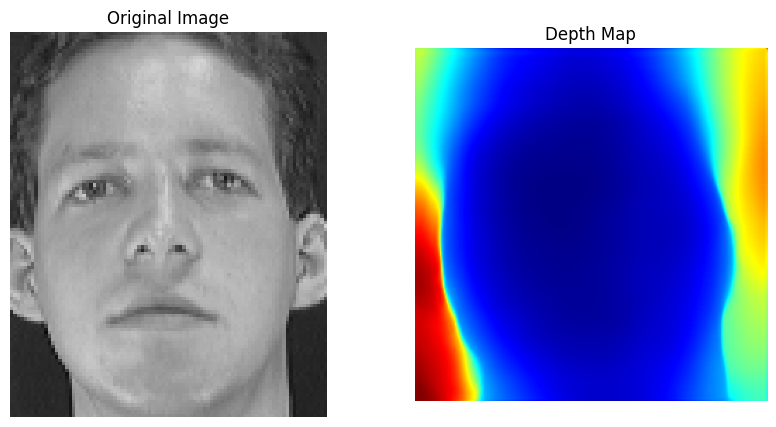

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_7.pgm


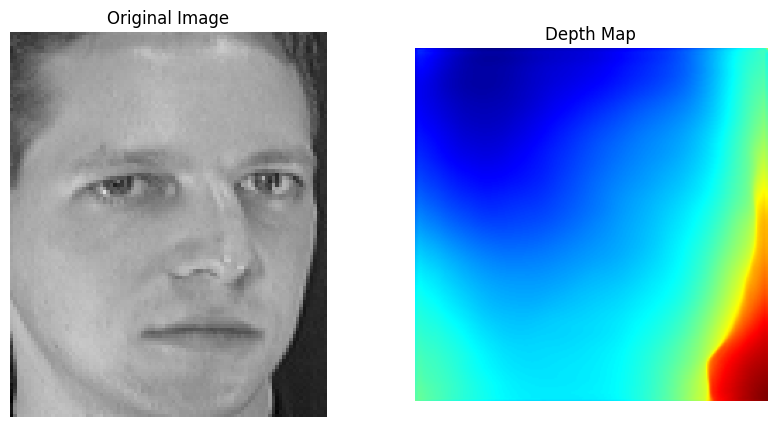

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_2.pgm


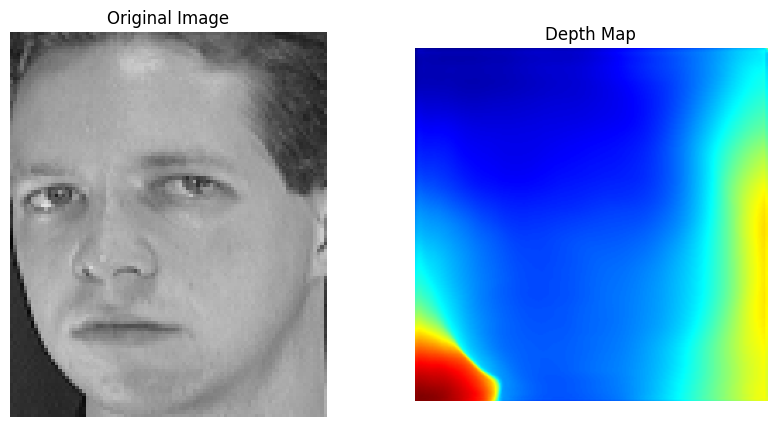

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_6.pgm


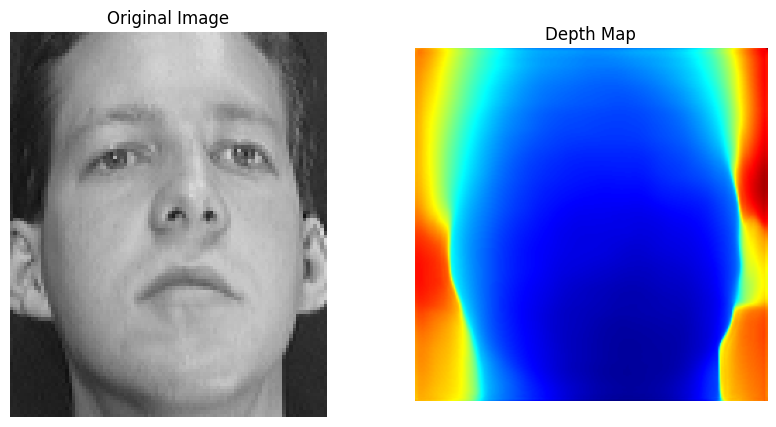

Depth map saved to : /content/drive/MyDrive/Siaseme NN/output_Depth_Maps/depth_map_9.pgm


In [18]:
dataset_path="/content/drive/MyDrive/Siaseme NN/at&t/data/faces/training/s1"
output_path="/content/drive/MyDrive/Siaseme NN/output_Depth_Maps"
process_dataset(dataset_path, output_path)